Laden Sie sich das Jupyter-Notebook ”Training eines MLPs auf MNIST” von der Vorlesungs-
seite auf Moodle herunter, das den Numpy-Code für den Backpropagation-Algorithmus für
MLPs enthält. Statt auf MNIST werden wir zunächst ein einfacheres Perzeptron auf den
Spielzeugdaten aus der Vorlesung trainieren.

1. Erzeugen Sie 200 zweidimensionale Trainingsdatenpunkte mithilfe einer Gleichvertei-
lung über dem Gebiet [−6,6]×[−6,6]. Speichern Sie diese in einer 200×2 Designmatrix.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
np.random.seed(11)
X_train = np.random.uniform(low=-6, high=6, size=(200, 2))  
print(X_train)

[[-3.83676373 -5.7662971 ]
 [-0.44137768  2.69920715]
 [-0.95755674 -0.17487482]
 [-5.84663022 -0.15154071]
 [ 5.30167983  4.20954107]
 [ 2.75957364 -4.69516714]
 [ 4.72685004  4.28585096]
 [-4.01896059  1.58800817]
 [-5.75419665 -4.59915277]
 [-2.20359226 -4.10505232]
 [ 3.10775506  3.81930429]
 [-1.86450611 -2.17441444]
 [-4.66006522 -4.99256228]
 [ 2.55271123  1.19452076]
 [-5.33191584 -0.24243262]
 [-1.17988223  4.17574797]
 [ 2.61419015  1.22476861]
 [ 0.62860586  5.38922877]
 [ 5.84007996 -1.9433514 ]
 [-3.12150385  3.55722905]
 [-5.23576283 -1.62461228]
 [-5.15972637 -2.16758752]
 [-5.15540886 -2.51683599]
 [ 3.48121348  4.86480385]
 [ 3.51145662  0.74182452]
 [ 1.39222062 -1.66219749]
 [-3.97419242 -0.7651088 ]
 [ 2.79390404 -5.24534851]
 [-5.75120425  3.2465768 ]
 [-2.40057589  2.4139713 ]
 [ 2.81601265  5.19485553]
 [-1.1960588  -1.69874486]
 [ 3.67880149  3.17389316]
 [ 1.83137688  3.73159889]
 [ 1.7065783   5.48932863]
 [-1.99350694  2.85903147]
 [ 5.39799967 -1.98763015]
 

2. Die Klassenlabels 0 und 1 werden so vergeben, dass alle Datenpunkte im 1. und 3.
Quadranten das Label 1 und im 2. und 4. Quadranten das Label 0 erhalten. Speichern
Sie die Labels in einem Array.

In [ ]:
def create_labels(X):
    y = np.zeros(X.shape[0])
    for i, (x1, x2) in enumerate(X):
        if np.sign(x1) == np.sign(x2):
            y[i] = 1
        else:
            y[i] = 0
    return y

In [12]:
y_train = create_labels(X_train)
print(y_train)

[1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.
 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 0.]


3. Erzeugen Sie einen gleich großen Testdatensatz nach demselben Prinzip. Stellen Sie
beide Datensätze zur Überprüfung als Scatterplot dar.

In [13]:
np.random.seed(22)
X_test = np.random.uniform(low=-6, high=6, size=(200, 2))  
print(X_test)

[[-3.49847355e+00 -2.19827259e-01]
 [-9.53543576e-01  4.31018398e+00]
 [-3.94606136e+00 -1.93363247e+00]
 [-2.75360600e+00  2.29249621e+00]
 [-3.35514580e+00  3.74341105e+00]
 [-5.87367751e+00  7.34444360e-01]
 [ 3.76471425e+00  2.94120355e+00]
 [-3.73066374e+00 -5.92630960e+00]
 [ 3.26452646e+00  5.49398602e+00]
 [ 2.42325461e+00 -2.42906080e+00]
 [ 3.21591290e+00  2.25861990e+00]
 [-1.35379824e+00  1.38246990e+00]
 [-8.69337122e-01  1.01147572e+00]
 [ 2.43162623e+00 -4.65725794e+00]
 [ 5.07923911e+00  5.86663529e+00]
 [ 2.12892928e+00  3.54197731e+00]
 [-5.65108381e+00 -3.86689115e+00]
 [ 4.49913294e+00  2.93918493e+00]
 [ 9.70819587e-02 -4.45999318e+00]
 [-1.88589139e-01  1.89281854e-01]
 [-2.26482404e+00 -5.45206149e+00]
 [-7.47832079e-01 -4.84938468e+00]
 [-5.45747866e+00  2.21794462e+00]
 [ 4.19028894e+00 -4.49751380e+00]
 [-4.45123191e+00 -3.23279975e-01]
 [-3.62929789e+00  3.37947299e+00]
 [ 1.28896636e+00 -6.77998869e-01]
 [ 5.78434930e+00  2.50746497e+00]
 [-3.37523501e+00 -3

In [14]:
y_test = create_labels(X_test)
print(y_test)

[1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0.]


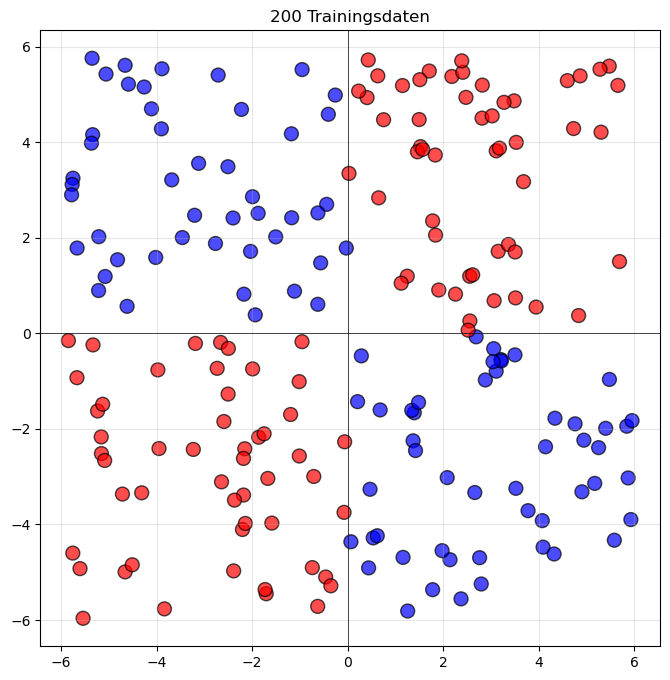

In [27]:
plt.figure(figsize=(8, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolor='k', s=100, alpha=0.7)
plt.title('200 Trainingsdaten')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.show()

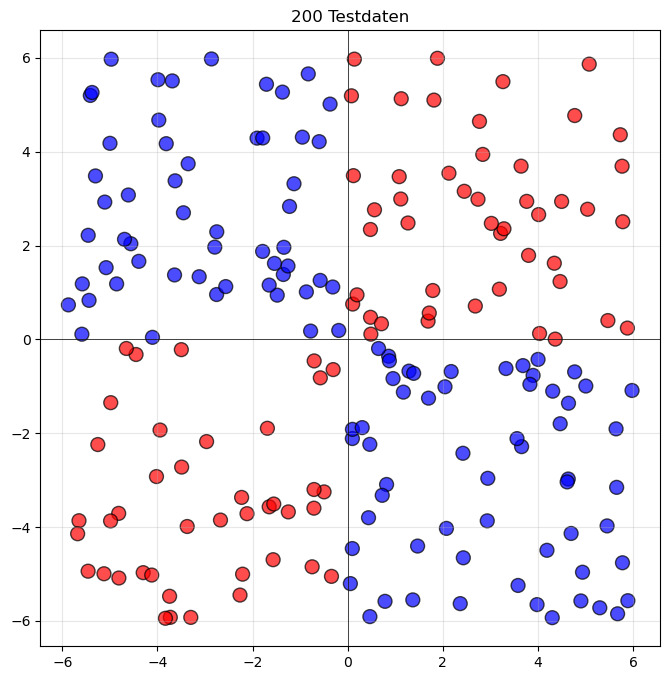

In [26]:
plt.figure(figsize=(8, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', edgecolor='k', s=100, alpha=0.7)
plt.title('200 Testdaten')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.show()

4. Das in der Vorlesung dargestellte Experiment operiert nicht direkt auf den Inputdaten,
sondern auf 2 Merkmalen, die mithilfe zweier Neuronen mit fixem Gewichtsvektor
berechnet werden: ein Neuron teilt die Inputebene waagrecht entlang der x-Achse, das
andere senkrecht entlang der y-Achse. Wie muss der Gewichtsvektor für das jeweilige
Neuron aussehen?

In [ ]:
w1 = np.array([0, 1]) # waagrecht entlang der x-Achse nimmt nur y werte
w2 = np.array([1, 0]) # senkrecht entlang der y-Achse nimmt nur x werte

array([1, 0])

5. Berechnen Sie die Entscheidungsfunktion beider Neuron mit der im Beispielcode
angegebenen sigmoiden Aktivierungsfunktion auf einem 100 ×100-Gitter innerhalb
des Gebietes [−6,6] ×[−6,6] und stellen Sie diese zur Überprüfung als Farbbild dar.

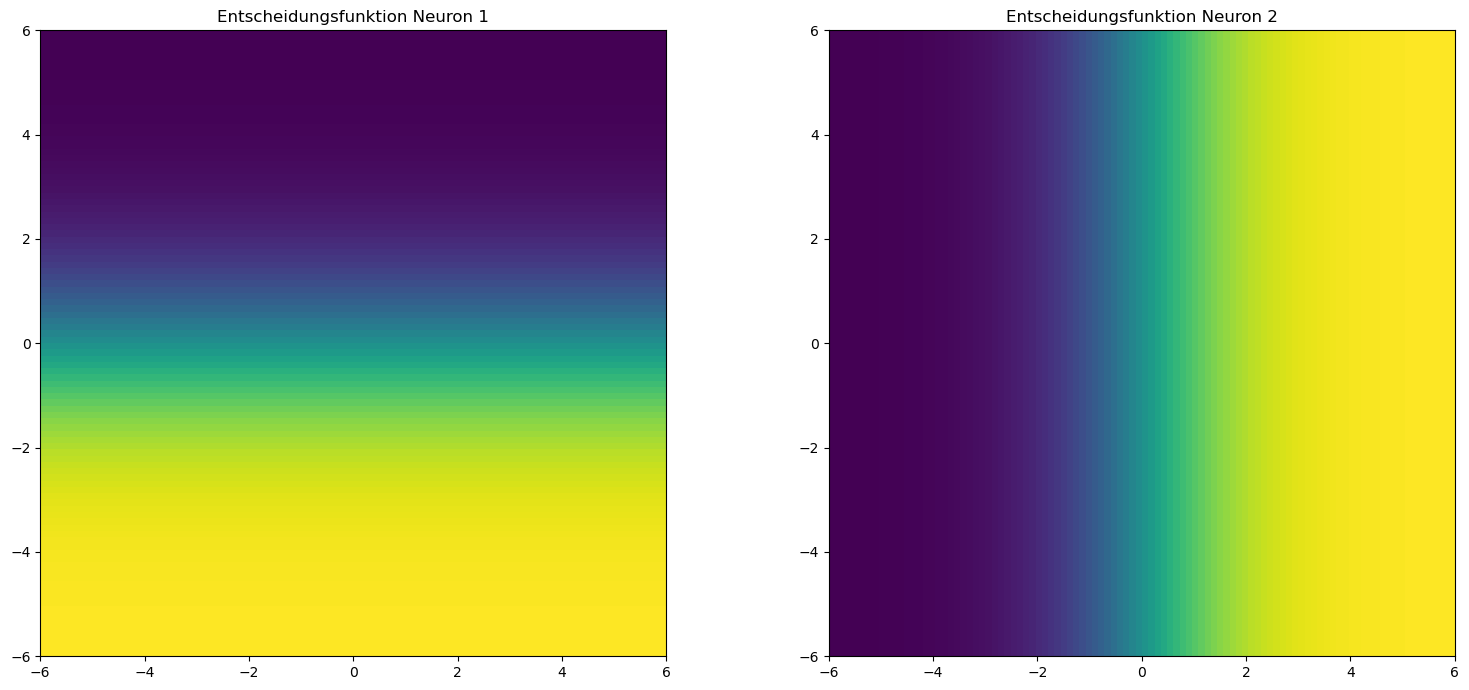

In [37]:
# Sigmoid (vektorisiert)
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

x1_range = np.linspace(-6, 6, 100)
x2_range = np.linspace(-6, 6, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)

z1 = sigmoid(w1[0] * X1 + w1[1] * X2)
z2 = sigmoid(w2[0] * X1 + w2[1] * X2)

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

im1 = axes[0].imshow(z1, extent=[-6, 6, -6, 6])
axes[0].set_title('Entscheidungsfunktion Neuron 1')

im2 = axes[1].imshow(z2, extent=[-6, 6, -6, 6])
axes[1].set_title('Entscheidungsfunktion Neuron 2')

plt.tight_layout()
plt.show()


6. Da die Eingangsneuronen nicht mittrainiert werden, können wir deren Output schon
im Vorfeld berechnen. Erzeugen Sie dazu neue Designmatritzen für den Trainings-
und Testdatensatz, so dass die erste Spalte den Output des ersten Neurons und die
zweite Spalte den Output des zweiten Neurons enthält. Erzeugen Sie auch eine entspre-
chende Designmatrix für Ihr 100 ×100-Gitter, das wir später zu Darstellungszwecken
brauchen werden. Wichtig: arbeiten Sie im Folgenden nur mit diesen transformierten
Designmatritzen, um korrekte Ergebnisse zu erhalten!

In [ ]:
X_train_transformed = np.zeros_like(X_train)
X_train_transformed[:, 0] = sigmoid(w1[0] * X_train[:, 0] + w1[1] * X_train[:, 1])
X_train_transformed[:, 1] = sigmoid(w2[0] * X_train[:, 0] + w2[1] * X_train[:, 1])

X_test_transformed = np.zeros_like(X_test)
X_test_transformed[:, 0] = sigmoid(w1[0] * X_test[:, 0] + w1[1] * X_test[:, 1])
X_test_transformed[:, 1] = sigmoid(w2[0] * X_test[:, 0] + w2[1] * X_test[:, 1])

X_grid_transformed = np.zeros((X1.size, 2))
X_grid_transformed[:, 0] = z1.flatten()
X_grid_transformed[:, 1] = z2.flatten()

print(X_grid_transformed.shape)

(10000, 2)


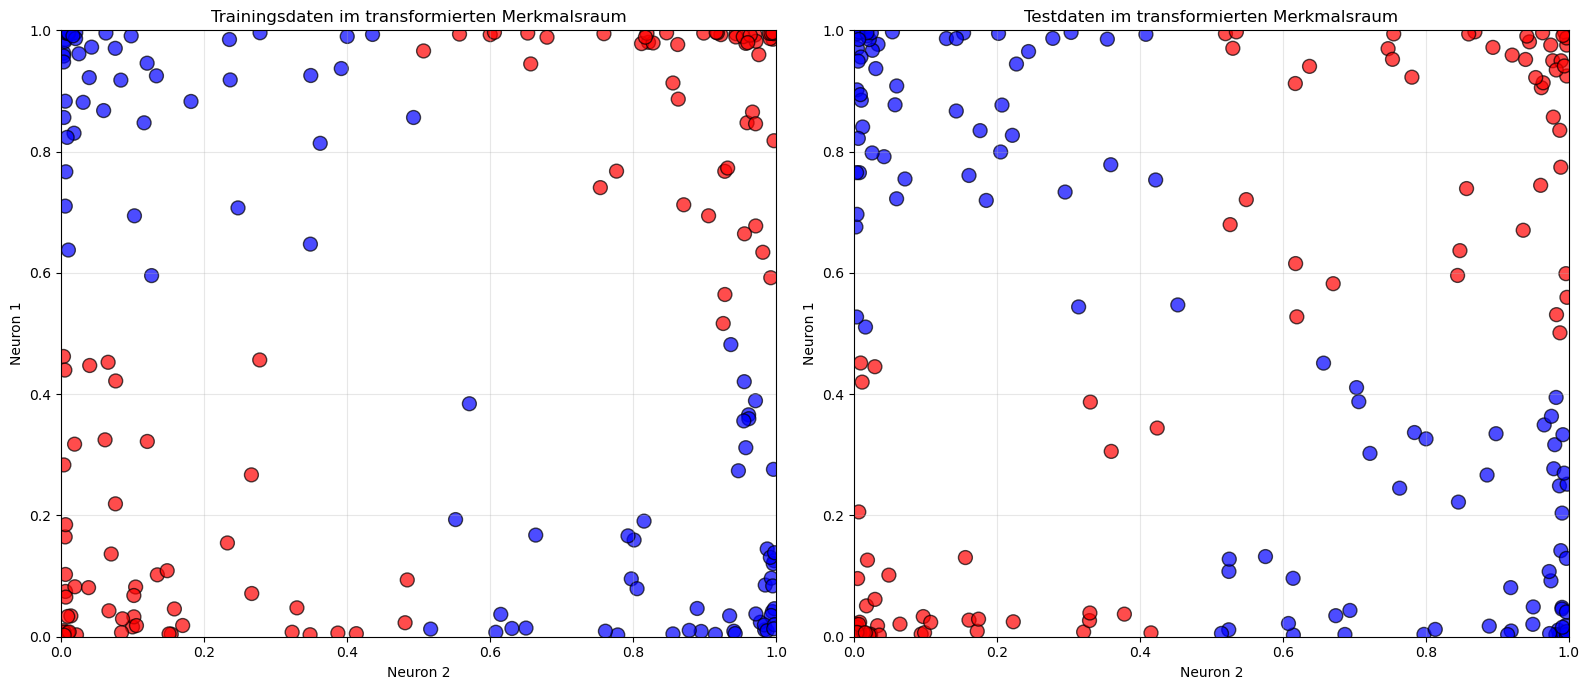

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# train
axes[0].scatter(X_train_transformed[:, 1], X_train_transformed[:, 0],
            c=y_train, cmap='bwr', edgecolor='k', s=100, alpha=0.7)
axes[0].set_title('Trainingsdaten im transformierten Merkmalsraum')
axes[0].set_xlabel('Neuron 2')
axes[0].set_ylabel('Neuron 1')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim([0, 1])
axes[0].set_ylim([0, 1])

# test
axes[1].scatter(X_test_transformed[:, 1], X_test_transformed[:, 0],
            c=y_test, cmap='bwr', edgecolor='k', s=100, alpha=0.7)
axes[1].set_title('Testdaten im transformierten Merkmalsraum')
axes[1].set_xlabel('Neuron 2')
axes[1].set_ylabel('Neuron 1')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim([0, 1])
axes[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

In [50]:
# # grid
# plt.scatter(X_grid_transformed[:, 1], X_grid_transformed[:, 0],
#             cmap='bwr', edgecolor='k', s=100, alpha=0.7)
# plt.title('Testdaten im transformierten Merkmalsraum')
# plt.xlabel('Neuron 2')
# plt.ylabel('Neuron 1')
# plt.grid(True, alpha=0.3)
# plt.xlim([0, 1])
# plt.ylim([0, 1])